<a href="https://colab.research.google.com/github/Parth-Rawri/German-Traffic-Sign-Recognition-Benchmark/blob/main/GTSRB_German_Traffic_Sign_Recognition_Benchmark.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## GTSRB - German Traffic Sign Recognition Benchmark
Multi-class, single-image classification challenge

In [ ]:
import os
import torch
import torchvision
import tarfile
import torch.nn as nn
import numpy as np
import torch.nn.functional as F
from torchvision.datasets.utils import download_url
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
import torchvision.transforms as tt
from torch.utils.data import random_split
from torchvision.utils import make_grid

#### Downloading GTSRB Dataset from Kaggle

* Single-image, multi-class classification problem
* Dataset consists of traffic sign images
* 43 classes, labeled from 0 - 42
* Training dataset with 39209 images
* Test Dataset with 12630 images

In [ ]:
!pip install opendatasets --upgrade --quiet

In [ ]:
import opendatasets as od

dataset_url = 'https://www.kaggle.com/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign'
od.download(dataset_url)

  0%|          | 0.00/612M [00:00<?, ?B/s]

100%|██████████| 612M/612M [00:21<00:00, 29.6MB/s]


The dataset is extracted to the directory `/content/gtsrb-german-traffic-sign`. It contains the Train and Test folders, containing the training set (39209 images) and test set (12630 images) respectively. The training set contains 40 folders, one for each class of images, while the test set contains unlabelled data. Let's verify this using `os.listdir`.

In [ ]:
# Looking into the data directory

data_dir = '/content/gtsrb-german-traffic-sign'
print(os.listdir(data_dir))

classes = os.listdir(data_dir + "/Train")
print(classes, len(classes))


['Train.csv', 'Test.csv', 'Test', 'Meta', 'Train', 'meta', 'train', 'test', 'Meta.csv']
['14', '35', '22', '37', '25', '33', '19', '8', '2', '21', '38', '5', '28', '20', '16', '4', '9', '34', '29', '36', '12', '17', '11', '27', '30', '10', '6', '39', '0', '26', '42', '41', '40', '32', '18', '7', '23', '15', '3', '24', '31', '1', '13'] 43


Removing Duplicate folders



In [ ]:
import shutil

# shutil.rmtree() is used to delete an entire directory tree
# shutil.rmtree(path, ignore_errors=False, onerror=None)

shutil.rmtree("/content/gtsrb-german-traffic-sign/meta")
shutil.rmtree("/content/gtsrb-german-traffic-sign/test")
shutil.rmtree("/content/gtsrb-german-traffic-sign/train")

Using the `ImageFolder` class from `torchvision` to load the data as PyTorch tensors.

This can't be done at the moment since our 'Test' folder has no subclasses `-_-`



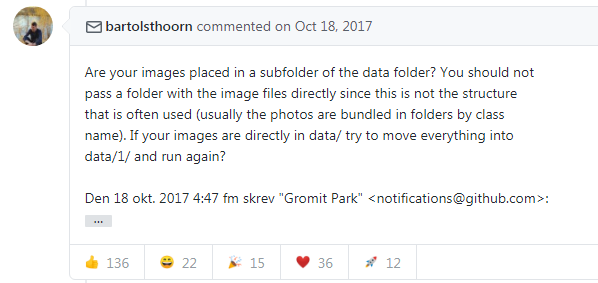

Shifting the Test dataset into another directory to use the `ImageFolder` class.

In [ ]:
# Creating directory 'TEST'
# os.mkdir(path, mode = 0o777, *, dir_fd = None)

os.mkdir("/content/gtsrb-german-traffic-sign/TEST")

In [ ]:
# Shifting 'test' to 'TEST'
# shutil.move(source, destination, copy_function = copy2)

shutil.move("/content/gtsrb-german-traffic-sign/Test", "/content/gtsrb-german-traffic-sign/TEST")

'/content/gtsrb-german-traffic-sign/TEST/Test'

#### Applying Transformations to the Dataset

* Resize to get (64, 64)  image size.
* ToTensor to transform the I/P image into PyTorch tensor.
* Normalize the data.

In [ ]:
# Data transforms (normalization & data augmentation)

train_transformations = tt.Compose([
                         # tt.RandomCrop(64, padding=4, padding_mode='reflect'), 
                         # tt.RandomHorizontalFlip(), 
                         # tt.RandomRotation(5),
                         # tt.RandomResizedCrop(256, scale=(0.5,0.9), ratio=(1, 1)), 
                         # tt.ColorJitter(brightness=0.1, contrast=0.1, saturation=0.1, hue=0.1),
                         # tt.Grayscale(num_output_channels=1),
                         tt.Resize((64,64)),
                         tt.ToTensor(),
                         tt.Normalize((0.3337, 0.3064, 0.3171),(0.2627, 0.2564, 0.2629), inplace=True)
                         ])

test_transformations = tt.Compose([tt.Resize((64,64)),
                         tt.ToTensor(),
                         tt.Normalize((0.3337, 0.3064, 0.3171),(0.2627, 0.2564, 0.2629))
                         ])

Using the `ImageFolder` class from `torchvision` to load the data as PyTorch tensors.

In [ ]:
# PyTorch datasets
dataset = ImageFolder(data_dir+'/Train', train_transformations)
test_ds = ImageFolder(data_dir+'/TEST', test_transformations)

len(dataset), len(test_ds)

(39209, 12630)

The list of classes is stored in the `.classes` property of the dataset.

In [ ]:
ds_classes = dataset.classes
print("Classes:", ds_classes)

Classes: ['0', '1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '3', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '4', '40', '41', '42', '5', '6', '7', '8', '9']


#### Analyzing the distribution of data in each subclasses.

looking inside a couple of folders :D

In [ ]:
Train_1_files = os.listdir(data_dir + '/Train/1')
print("No. of training examples for 1:", len(Train_1_files))
print(Train_1_files[:3])

No. of training examples for 1: 2220
['00001_00050_00013.png', '00001_00058_00026.png', '00001_00070_00011.png']


In [ ]:
Train_16_files = os.listdir(data_dir + '/Train/16')
print("No. of training examples for 16:", len(Train_16_files))
print(Train_16_files[:3])

No. of training examples for 16: 420
['00016_00005_00016.png', '00016_00007_00003.png', '00016_00004_00011.png']


In [ ]:
Train_25_files = os.listdir(data_dir + '/Train/25')
print("No. of training examples for 25:", len(Train_25_files))
print(Train_25_files[:3])

No. of training examples for 25: 1500
['00025_00037_00015.png', '00025_00008_00014.png', '00025_00000_00006.png']


In [ ]:
Test_files = os.listdir(data_dir + '/TEST/Test')
print("No. of test examples:", len(Test_files))
print(Test_files[:3])

No. of test examples: 12631
['09336.png', '09840.png', '04689.png']


Looking at a sample element from the training dataset. Each element is a tuple, containing a image tensor and a label.

In [ ]:
for img, label in dataset:
    print(img.shape, label, '\n')
    print(img, '\n')
    break

torch.Size([3, 64, 64]) 0 

tensor([[[-0.1507, -0.1507, -0.1656,  ..., -0.3000, -0.2850, -0.2850],
         [-0.1208, -0.1357, -0.1507,  ..., -0.2701, -0.2402, -0.2402],
         [-0.0760, -0.0760, -0.0910,  ..., -0.1805, -0.1507, -0.1507],
         ...,
         [ 0.0583,  0.0732,  0.0882,  ...,  0.2524,  0.1777,  0.1330],
         [ 0.0135,  0.0434,  0.0882,  ...,  0.1927,  0.1180,  0.0882],
         [-0.0014,  0.0285,  0.0882,  ...,  0.1628,  0.1031,  0.0732]],

        [[-0.0020, -0.0020, -0.0173,  ..., -0.1550, -0.1703, -0.1703],
         [ 0.0133,  0.0133, -0.0020,  ..., -0.1244, -0.1244, -0.1244],
         [ 0.0592,  0.0439,  0.0286,  ..., -0.0479, -0.0326, -0.0326],
         ...,
         [ 0.1968,  0.2274,  0.2733,  ...,  0.4415,  0.3803,  0.3651],
         [ 0.1203,  0.1662,  0.2580,  ...,  0.3651,  0.3345,  0.3039],
         [ 0.0897,  0.1356,  0.2580,  ...,  0.3345,  0.3039,  0.2886]],

        [[-0.0128, -0.0128, -0.0278,  ..., -0.2068, -0.2217, -0.2217],
         [ 0.0021

In [ ]:
img, label = dataset[0]
print(img.shape, label)
img

torch.Size([3, 64, 64]) 0


tensor([[[-0.1507, -0.1507, -0.1656,  ..., -0.3000, -0.2850, -0.2850],
         [-0.1208, -0.1357, -0.1507,  ..., -0.2701, -0.2402, -0.2402],
         [-0.0760, -0.0760, -0.0910,  ..., -0.1805, -0.1507, -0.1507],
         ...,
         [ 0.0583,  0.0732,  0.0882,  ...,  0.2524,  0.1777,  0.1330],
         [ 0.0135,  0.0434,  0.0882,  ...,  0.1927,  0.1180,  0.0882],
         [-0.0014,  0.0285,  0.0882,  ...,  0.1628,  0.1031,  0.0732]],

        [[-0.0020, -0.0020, -0.0173,  ..., -0.1550, -0.1703, -0.1703],
         [ 0.0133,  0.0133, -0.0020,  ..., -0.1244, -0.1244, -0.1244],
         [ 0.0592,  0.0439,  0.0286,  ..., -0.0479, -0.0326, -0.0326],
         ...,
         [ 0.1968,  0.2274,  0.2733,  ...,  0.4415,  0.3803,  0.3651],
         [ 0.1203,  0.1662,  0.2580,  ...,  0.3651,  0.3345,  0.3039],
         [ 0.0897,  0.1356,  0.2580,  ...,  0.3345,  0.3039,  0.2886]],

        [[-0.0128, -0.0128, -0.0278,  ..., -0.2068, -0.2217, -0.2217],
         [ 0.0021,  0.0021, -0.0128,  ..., -0

**Training and Validation Datasets**

Split the dataset into 3 parts (Test dataset is given):

1. **Training set** - used to train the model i.e. compute the loss and adjust the weights of the model using gradient descent.
2. **Validation set** - used to evaluate the model while training, adjust hyperparameters (learning rate etc.) and pick the best version of the model.
3. **Test set** - used to compare different models, or different types of modeling approaches, and report the final accuracy of the model.

Since there's no predefined validation set, we can set aside a small portion (5000 images) of the training set to be used as the validation set. We'll use the `random_split` helper method from PyTorch to do this. To ensure that we always create the same validation set, we'll also set a seed for the random number generator.

In [ ]:
random_seed = 34
torch.manual_seed(random_seed);

In [ ]:
from torch.utils.data import random_split

val_size = 5000
train_size = len(dataset) - val_size

train_ds, val_ds = random_split(dataset, [train_size, val_size])

print("Training dataset size:", len(train_ds))
print("Valuation dataset size:", len(val_ds))
print("Test dataset size:", len(test_ds))

Training dataset size: 34209
Valuation dataset size: 5000
Test dataset size: 12630


We can view the image using `matplotlib`, but we need to change the tensor dimensions to `(bla,bleh,3)`. Let's create a helper function to display an image and its label.

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

In [ ]:
def show_image(img, label):
    print('Label: ', label)
    plt.imshow(img.permute(1, 2, 0))

Let's look at a couple of images from the dataset.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Label:  4


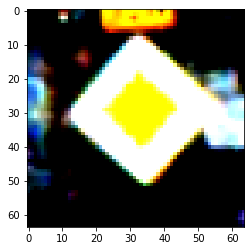

In [ ]:
img, label = train_ds[45]
show_image(img, label)

Label:  10


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


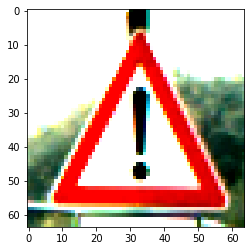

In [ ]:
img, label = train_ds[65]
show_image(img, label)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Label:  20


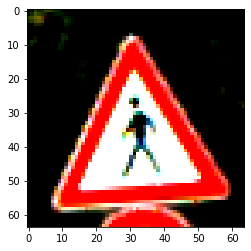

In [ ]:
img, label = train_ds[57]
show_image(img, label)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Label:  40


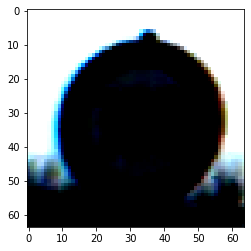

In [ ]:
img, label = val_ds[7]
show_image(img, label)

We can now create data loaders for training and validation, to load the data in batches.

In [ ]:
batch_size = 128

# PyTorch data loaders
train_dl = DataLoader(train_ds, batch_size, shuffle=True, num_workers=3, pin_memory=True)
val_dl = DataLoader(val_ds, batch_size, num_workers=3, pin_memory=True)
test_dl = DataLoader(test_ds, batch_size, num_workers=3, pin_memory=True)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 3 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [ ]:

def denormalize(images, means, stds):
    means = torch.tensor(means).reshape(1, 3, 1, 1)
    stds = torch.tensor(stds).reshape(1, 3, 1, 1)
    return images * stds + means

def show_batch(dl):
    
    for images, labels in dl:
        fig, ax = plt.subplots(figsize=(12, 12))
        ax.set_xticks([]) 
        ax.set_yticks([])
        denorm_images = denormalize(images, (0.3337, 0.3064, 0.3171),(0.2627, 0.2564, 0.2629))
        ax.imshow(make_grid(denorm_images[:64], nrow=11).permute(1, 2, 0).clamp(0,1))
        # ax.imshow(make_grid(images, nrow=11).permute(1, 2, 0))
        break

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 3 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


BEFORE  NORMALIZATION


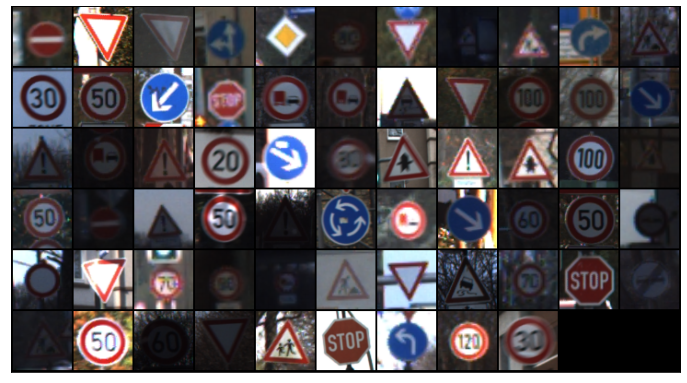

In [ ]:
print("BEFORE  NORMALIZATION")
show_batch(train_dl)

In [ ]:
def show_batch(dl):
    
    for images, labels in dl:
        fig, ax = plt.subplots(figsize=(14, 14))
        ax.set_xticks([]) 
        ax.set_yticks([])
        ax.imshow(make_grid(images, nrow=16).permute(1, 2, 0))
        break

AFTER  NORMALIZATION


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 3 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


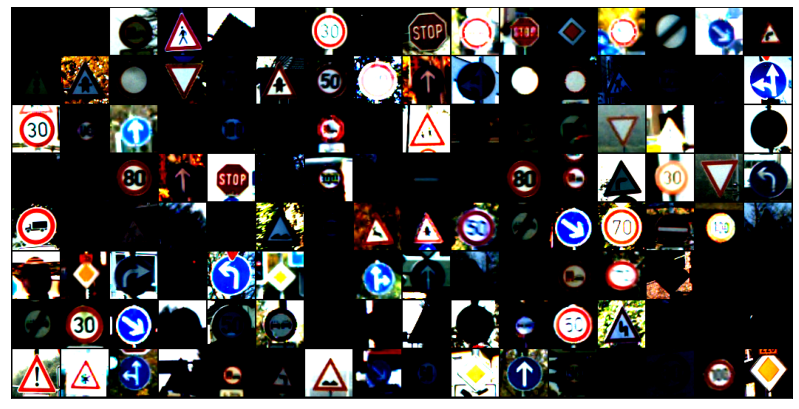

In [ ]:
print("AFTER  NORMALIZATION")
show_batch(train_dl)

### Using a GPU

GPUs contain hundreds of cores optimized for performing expensive matrix operations on floating-point numbers quickly, making them ideal for training deep neural networks.

We can check if a GPU is available and the required NVIDIA CUDA drivers are installed using `torch.cuda.is_available`.

To seamlessly use a GPU, if one is available, we define a couple of helper functions (`get_default_device` & `to_device`) and a helper class `DeviceDataLoader` to move our model & data to the GPU as required.

> Let's define a helper function to ensure that our code uses the GPU if available and defaults to using the CPU if it isn't.

In [ ]:
def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')

> Next, let's define a function that can move data and model to a chosen device.

In [ ]:
def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

> Finally, we define a `DeviceDataLoader` class to wrap our existing data loaders and move batches of data to the selected device. <br> Interestingly, we don't need to extend an existing class to create a PyTorch datal loader. All we need is an `__iter__` method to retrieve batches of data and an `__len__` method to get the number of batches.

In [ ]:
class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device
        
    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl: 
            yield to_device(b, self.device)

    def __len__(self):
        """Number of batches"""
        return len(self.dl)

Based on where you're running this notebook, your default device could be a CPU (`torch.device('cpu')`) or a GPU (`torch.device('cuda')`)

In [ ]:
device = get_default_device()
device

device(type='cuda')

We can now wrap our training and validation data loaders using `DeviceDataLoader` for automatically transferring batches of data to the GPU (if available).

In [ ]:
train_dl = DeviceDataLoader(train_dl, device)
val_dl = DeviceDataLoader(val_dl, device)
test_dl = DeviceDataLoader(test_dl, device)

### Developing Model with Residual Blocks and Batch Normalization

![](https://miro.medium.com/max/1140/1*D0F3UitQ2l5Q0Ak-tjEdJg.png)

#### Here is a very simple Residual block:

In [ ]:
class SimpleResidualBlock(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=3, kernel_size=3, stride=1, padding=1)
        self.relu1 = nn.ReLU()
        self.conv2 = nn.Conv2d(in_channels=3, out_channels=3, kernel_size=3, stride=1, padding=1)
        self.relu2 = nn.ReLU()
        
    def forward(self, x):
        out = self.conv1(x)
        out = self.relu1(out)
        out = self.conv2(out)
        out = self.relu2(out) + x # ReLU can be applied before or after adding the input
        
        return out 

In [ ]:
simple_resnet = to_device(SimpleResidualBlock(), device)

In [ ]:
for images, labels in train_dl:
    out = simple_resnet(images)
    print(out.shape)
    break

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 3 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


torch.Size([128, 3, 64, 64])


In [ ]:
del simple_resnet, images, labels
torch.cuda.empty_cache()

This seeming small change produces a drastic improvement in the performance of the model. Also, after each convolutional layer, we'll add a batch normalization layer, which normalizes the outputs of the previous layer.

### Model

In [ ]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

class ImageClassificationBase(nn.Module):
    def training_step(self, batch):
        images, labels = batch 
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss
    
    def validation_step(self, batch):
        images, labels = batch 
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss.detach(), 'val_acc': acc}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print(f"Epoch [{epoch}], last_lr: {result['lrs'][-1]:.5f}, train_loss: {result['train_loss']:.4f}, val_loss: {result['val_loss']:.4f}, val_acc: {result['val_acc']:.4f}")

In [ ]:
def conv_block(in_channels, out_channels, pool=False):
    layers = [nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1, stride=1), 
              nn.BatchNorm2d(out_channels), 
              nn.ReLU(inplace=True)]
    if pool: 
      layers.append(nn.MaxPool2d((2,2), 2))
    return nn.Sequential(*layers)
 

class ResNet9(ImageClassificationBase):
    def __init__(self, in_channels, num_classes):
        super().__init__()
        # I/P: 128 x 3 x 64 x 64
        
        self.conv1 = conv_block(in_channels, 64)       # 128 x 64 x 64 x 64                                 
        self.conv2 = conv_block(64, 128, pool=True)    # 128 x 128 x 32 x 32
        self.res1 = nn.Sequential(conv_block(128, 128), conv_block(128, 128)) # 128 x 128 x 32 x 32
        
        self.conv3 = conv_block(128, 256, pool=True)   # 128 x 256 x 16 x 16
        self.conv4 = conv_block(256, 512, pool=True)   # 128 x 512 x 8 x 8
        self.res2 = nn.Sequential(conv_block(512, 512), conv_block(512, 512)) # 128 x 512 x 8 x 8
        
        self.classifier = nn.Sequential(nn.MaxPool2d((4,4), 4),  # 128 x 512 x 2 x 2   
                                        nn.Flatten(),     # 128 x 2048
                                        nn.Dropout(0.2),  # 128 x 2048
                                        nn.Linear(2048, num_classes))  # 128 x 2048 x 43
    def forward(self, xb):
        out = self.conv1(xb)
        out = self.conv2(out)
        out = self.res1(out) + out
        out = self.conv3(out)
        out = self.conv4(out)
        out = self.res2(out) + out
        out = self.classifier(out)
        return out

In [ ]:
model = to_device(ResNet9(3, 43), device)
model

ResNet9(
  (conv1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
  )
  (conv2): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=(2, 2), stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (res1): Sequential(
    (0): Sequential(
      (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
    )
    (1): Sequential(
      (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inpla

### Training the Model

**Techniques used:**


* **Learning rate scheduling**: Instead of using a fixed learning rate, we will use a learning rate scheduler, which will change the learning rate after every batch of training. There are many strategies for varying the learning rate during training, and the one we'll use is called the **"One Cycle Learning Rate Policy"**, which involves starting with a low learning rate, gradually increasing it batch-by-batch to a high learning rate for about 30% of epochs, then gradually decreasing it to a very low value for the remaining epochs. Learn more: https://sgugger.github.io/the-1cycle-policy.html

* **Weight decay**: We also use weight decay, which is yet another regularization technique which prevents the weights from becoming too large by adding an additional term to the loss function.Learn more: https://towardsdatascience.com/this-thing-called-weight-decay-a7cd4bcfccab

* **Gradient clipping**: Apart from the layer weights and outputs, it also helpful to limit the values of gradients to a small range to prevent undesirable changes in parameters due to large gradient values. This simple yet effective technique is called gradient clipping. Learn more: https://towardsdatascience.com/what-is-gradient-clipping-b8e815cdfb48



In [ ]:
@torch.no_grad()
def evaluate(model, val_dl):
    model.eval()
    outputs = [model.validation_step(batch) for batch in val_dl]
    return model.validation_epoch_end(outputs)

def get_lr(optimizer):
    for param_group in optimizer.param_groups:
        return param_group['lr']

def fit_one_cycle(epochs, max_lr, model, train_dl, val_dl, weight_decay=0, grad_clip=None, opt_func=torch.optim.Adam):
    torch.cuda.empty_cache()
    history = []
    
    # Set up cutom optimizer with weight decay
    optimizer = opt_func(model.parameters(), max_lr, weight_decay=weight_decay)
    # Set up one-cycle learning rate scheduler
    sched = torch.optim.lr_scheduler.OneCycleLR(optimizer, max_lr, epochs=epochs, steps_per_epoch=len(train_dl))
    
    for epoch in range(epochs):
        # Training Phase 
        model.train()
        train_losses = []
        lrs = []
        for batch in train_dl:
            loss = model.training_step(batch)
            train_losses.append(loss)
            loss.backward()
            
            # Gradient clipping
            if grad_clip: 
                nn.utils.clip_grad_value_(model.parameters(), grad_clip)
            
            optimizer.step()
            optimizer.zero_grad()
            
            # Record & update learning rate
            lrs.append(get_lr(optimizer))
            sched.step()
        
        # Validation phase
        result = evaluate(model, val_dl)
        result['train_loss'] = torch.stack(train_losses).mean().item()
        result['lrs'] = lrs
        model.epoch_end(epoch, result)
        history.append(result)
    return history

In [ ]:
history = [evaluate(model, val_dl)]
history

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 3 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


[{'val_acc': 0.0556640625, 'val_loss': 3.7572364807128906}]

In [ ]:
epochs = 8
max_lr = 0.01
grad_clip = 0.1
weight_decay = 1e-4
opt_func = torch.optim.Adam

In [ ]:
%%time
history += fit_one_cycle(epochs, max_lr, model, train_dl, val_dl, 
                             grad_clip=grad_clip, 
                             weight_decay=weight_decay, 
                             opt_func=opt_func)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 3 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Epoch [0], last_lr: 0.00394, train_loss: 1.2217, val_loss: 0.2514, val_acc: 0.9242
Epoch [1], last_lr: 0.00935, train_loss: 0.2831, val_loss: 0.2038, val_acc: 0.9514
Epoch [2], last_lr: 0.00972, train_loss: 0.0617, val_loss: 1.5213, val_acc: 0.8242
Epoch [3], last_lr: 0.00812, train_loss: 0.0783, val_loss: 0.0133, val_acc: 0.9969
Epoch [4], last_lr: 0.00556, train_loss: 0.0205, val_loss: 0.0829, val_acc: 0.9762
Epoch [5], last_lr: 0.00283, train_loss: 0.0129, val_loss: 0.0106, val_acc: 0.9975
Epoch [6], last_lr: 0.00077, train_loss: 0.0018, val_loss: 0.0052, val_acc: 0.9986
Epoch [7], last_lr: 0.00000, train_loss: 0.0002, val_loss: 0.0049, val_acc: 0.9986
CPU times: user 3min 1s, sys: 2min 31s, total: 5min 32s
Wall time: 5min 43s


In [ ]:
def plot_accuracies(history):
    accuracies = [x['val_acc'] for x in history]
    plt.plot(accuracies, '-x')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.title('Accuracy vs. No. of epochs');

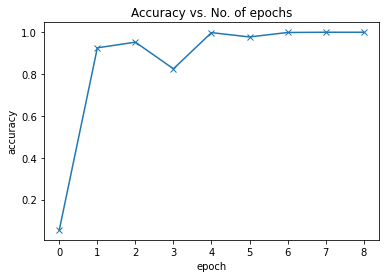

In [ ]:
plot_accuracies(history)

In [ ]:
def plot_losses(history):
    train_losses = [x.get('train_loss') for x in history]
    val_losses = [x['val_loss'] for x in history]
    plt.plot(train_losses, '-bx')
    plt.plot(val_losses, '-rx')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['Training', 'Validation'])
    plt.title('Loss vs. No. of epochs');

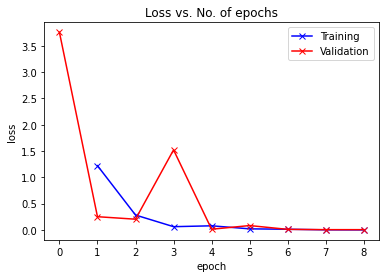

In [ ]:
plot_losses(history)

### Testing with Individual Images

In [ ]:
def predict_image(img, model):
    # Convert to a batch of 1
    xb = to_device(img.unsqueeze(0), device)
    # Get predictions from model
    yb = model(xb)
    # Pick index with highest probability
    _, preds  = torch.max(yb, dim=1)
    # Retrieve the class label
    return train_ds.classes[preds[0].item()]

#### Evaluation on Test set

In [ ]:
test_size = len(test_ds)
print("Test dataset size:", test_size)
print(ds_classes)

Test dataset size: 12630
['0', '1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '3', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '4', '40', '41', '42', '5', '6', '7', '8', '9']


In [ ]:
import pandas as pd

df = pd.read_csv('/content/gtsrb-german-traffic-sign/Test.csv')
df.head()

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,53,54,6,5,48,49,16,Test/00000.png
1,42,45,5,5,36,40,1,Test/00001.png
2,48,52,6,6,43,47,38,Test/00002.png
3,27,29,5,5,22,24,33,Test/00003.png
4,60,57,5,5,55,52,11,Test/00004.png


In [ ]:
def predict_image(img, model):
    # Convert to a batch of 1
    xb = to_device(img.unsqueeze(0), device)
    # Get predictions from model
    yb = model(xb)
    # Pick index with highest probability
    _, preds  = torch.max(yb, dim=1)
    # Retrieve the class label
    return ds_classes[preds[0].item()]

In [ ]:
ground_truth = df.loc[[0], 'ClassId']
ground_truth.item()

16

In [ ]:
img, _ = test_ds[0]
int(predict_image(img, model))

16

In [ ]:
count = 0

for i in range(test_size):
    
    # Returns the data present in the 'ClassId' column of the 'i'th row
    ground_truth = df.loc[[i], 'ClassId'] 

    img, _ = test_ds[i]
    prediction = predict_image(img, model)

    if ground_truth.item() == int(prediction):
      count += 1
    continue  

print(f'Successful predictions: {count}/{test_size}')    
test_accuracy = (count/test_size)*100
print('Accuracy on Test Data:', test_accuracy)

Successful predictions: 12524/12630
Accuracy on Test Data: 99.16072842438638
